# Web Scraping con Beautiful Soup.

* * * 

### Iconos utilizados en este cuaderno
🔔 **Pregunta**: Una pregunta rápida para ayudarte a entender lo que está pasando.<br>
🥊 **Desafío**: Ejercicio interactivo. ¡Trabajaremos en estos durante el taller!<br>
⚠️ **Advertencia**: Aviso sobre cosas complicadas o errores comunes.<br>
💡 **Consejo**: Cómo hacer algo de manera más eficiente o efectiva.<br>
🎬 **Demostración**: Mostrar algo más avanzado, para que sepas para qué se puede usar Python.<br>

### Objetivos de aprendizaje
1. [Reflexión: ¿Raspado o no raspado?](#when)
2. [Extracción y análisis de HTML](#extract)
3. [Raspado de la Asamblea General de Illinois](#scrape)


<a id='when'></a>

# Scrape o no Scrape

Cuando queremos acceder a datos de la web, primero debemos asegurarnos de si el sitio web que nos interesa ofrece una API web. Plataformas como Twitter, Reddit y el New York Times ofrecen APIs. **Consulta el taller de APIs web de [Python de D-Labs](https://github.com/dlab-berkeley/Python-Web-APIs) si quieres aprender a usar APIs.**

Sin embargo, a menudo hay casos en los que no existe una API web. En estos casos, podemos recurrir al web scraping, donde extraemos el HTML subyacente de una página web y obtenemos directamente la información que queremos. Hay varios paquetes en Python que podemos usar para realizar estas tareas. Nos centraremos en dos paquetes: Requests y Beautiful Soup.

Nuestro estudio de caso será raspar información sobre los [senadores estatales de Illinois](http://www.ilga.gov/senate), así como la [lista de proyectos de ley](http://www.ilga.gov/senate/SenatorBills.asp?MemberID=1911&GA=98&Primary=True) que cada senador ha patrocinado. Antes de comenzar, revisa estos sitios web para ver su estructura.




## Instalación

Usaremos dos paquetes principales: [Requests](http://docs.python-requests.org/en/latest/user/quickstart/) y [Beautiful Soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/). Adelante, instala estos paquetes si aún no lo has hecho:


In [1]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


También instalaremos el paquete `lxml` que ayuda a soportar parte del análisis que realiza Beautiful Soup:

In [3]:
%pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import required libraries
from bs4 import BeautifulSoup
from datetime import datetime
import requests
import time

<a id='extract'></a>

# Extracción y Análisis de HTML 

Para realizar correctamente la extracción y el análisis de HTML, seguiremos los siguientes 4 pasos:
1. Realizar una solicitud GET
2. Analizar la página con Beautiful Soup
3. Buscar elementos HTML
4. Obtener atributos y texto de estos elementos

## Paso 1: Realizar una Solicitud GET para Obtener el HTML de una Página

Podemos usar la biblioteca Requests para:

1. Hacer una solicitud GET a la página, y  
2. Leer el código HTML de la página web.

El proceso de realizar una solicitud y obtener un resultado se asemeja al flujo de trabajo de una API web. Sin embargo, en este caso, estamos haciendo una solicitud directamente al sitio web, y tendremos que analizar el HTML por nuestra cuenta. Esto contrasta con recibir datos organizados en un formato más sencillo como `JSON` o `XML`.


In [109]:
# Make a GET request
req = requests.get('https://www.ilga.gov/house/default.asp')
# Read the content of the server’s response
src = req.text
# Parse the response into an HTML tree
soup = BeautifulSoup(src, 'lxml')

## Paso 2: Analizar la Página con Beautiful Soup

Ahora utilizamos la función `BeautifulSoup` para analizar la respuesta y convertirla en un árbol HTML. Esto devuelve un objeto (llamado **soup object**) que contiene todo el HTML del documento original.

Si encuentras un error relacionado con una biblioteca de análisis, asegúrate de haber instalado el paquete `lxml` para proporcionar a Beautiful Soup las herramientas necesarias para el análisis.

In [110]:
# Parse the response into an HTML tree
soup = BeautifulSoup(src, 'lxml')
# Take a look
print(soup.prettify()[:1000])

<html lang="en">
 <!-- Trigger/Open The Modal -->
 <body>
  <div style="position: fixed; z-index: 999; top: 5; left: 600; background-color: navy; display: block">
   <button id="myBtn" style="color: white; background-color: navy; display: block">
    Translate Website
   </button>
  </div>
  <!-- The Modal -->
  <div class="modal" id="myModal" style="display: none">
   <!-- Modal content -->
   <div class="modal-content">
    <div class="modal-header">
     <h3>
      <span class="close">
       ×
      </span>
     </h3>
    </div>
    <p>
     The Illinois General Assembly offers the Google Translate service for visitor convenience. In no way should it be considered accurate as to the translation of any content herein.
    </p>
    <p>
     Visitors of the Illinois General Assembly website are encouraged to use other translation services available on the internet.
    </p>
    <p>
     The English language version is always the official and authoritative version of this website.
   

La salida se ve bastante similar a la anterior, pero ahora está organizada en un objeto `soup`, lo que nos permite recorrer la página con mayor facilidad.


## Paso 3: Buscar Elementos HTML

Beautiful Soup ofrece varias funciones para encontrar componentes útiles en una página. Permite buscar elementos utilizando:

1. Etiquetas HTML  
2. Atributos HTML  
3. Selectores CSS  

Primero, busquemos **etiquetas HTML**.  

La función `find_all` busca en el árbol de `soup` todos los elementos con una etiqueta HTML específica y devuelve todos esos elementos.

**¿Qué hace el siguiente ejemplo?**



In [111]:
# Find all elements with a certain tag
a_tags = soup.find_all("a")
print(a_tags[:10])

[<a class="goog-logo-link" href="https://translate.google.com" target="_blank"><img alt="Google Translate" height="14" src="https://www.gstatic.com/images/branding/googlelogo/1x/googlelogo_color_42x16dp.png" style="padding-right: 3px;" width="37"/>Translate</a>, <a href="/default.asp"><img alt="Illinois General Assembly" border="0" height="49" src="/images/logo_sm.gif" width="462"/></a>, <a class="mainmenu" href="/">Home</a>, <a class="mainmenu" href="/legislation/" onblur="HM_f_PopDown('elMenu1')" onfocus="HM_f_PopUp('elMenu1',event)" onmouseout="HM_f_PopDown('elMenu1')" onmouseover="HM_f_PopUp('elMenu1',event)">Legislation &amp; Laws</a>, <a class="mainmenu" href="/senate/" onblur="HM_f_PopDown('elMenu3')" onfocus="HM_f_PopUp('elMenu3',event)" onmouseout="HM_f_PopDown('elMenu3')" onmouseover="HM_f_PopUp('elMenu3',event)">Senate</a>, <a class="mainmenu" href="/house/" onblur="HM_f_PopDown('elMenu2')" onfocus="HM_f_PopUp('elMenu2',event)" onmouseout="HM_f_PopDown('elMenu2')" onmouseove

Dado que `find_all()` es el método más popular en la API de búsqueda de Beautiful Soup, existe un atajo para usarlo. Si tratas al objeto `BeautifulSoup` como si fuera una función, es equivalente a llamar a `find_all()` en ese objeto.

Estas dos líneas de código son equivalentes:

In [112]:
a_tags = soup.find_all("a")
a_tags_alt = soup("a")
print(a_tags[0])
print(a_tags_alt[0])

<a class="goog-logo-link" href="https://translate.google.com" target="_blank"><img alt="Google Translate" height="14" src="https://www.gstatic.com/images/branding/googlelogo/1x/googlelogo_color_42x16dp.png" style="padding-right: 3px;" width="37"/>Translate</a>
<a class="goog-logo-link" href="https://translate.google.com" target="_blank"><img alt="Google Translate" height="14" src="https://www.gstatic.com/images/branding/googlelogo/1x/googlelogo_color_42x16dp.png" style="padding-right: 3px;" width="37"/>Translate</a>


¿Cuántos enlaces obtuvimos?

In [113]:
print(len(a_tags))

382


¡Eso es mucho! Muchos elementos en una página tendrán la misma etiqueta HTML. Por ejemplo, si buscas todo lo que tenga la etiqueta `a`, probablemente obtendrás muchos resultados, muchos de los cuales quizás no quieras. Recuerda que la etiqueta `a` define un hipervínculo, por lo que generalmente encontrarás muchos en cualquier página.

¿Qué pasa si queremos buscar etiquetas HTML con ciertos atributos, como clases CSS específicas?

Podemos hacerlo agregando un argumento adicional a la función `find_all`. En el ejemplo siguiente, estamos encontrando todas las etiquetas `a` y luego filtrando aquellas con `class_="sidemenu"`:


In [114]:
# Get only the 'a' tags in 'sidemenu' class
side_menus = soup("a", class_="sidemenu")
side_menus[:5]

[<a class="sidemenu" href="/house/default.asp">  Members  </a>,
 <a class="sidemenu" href="/house/committees/default.asp">  Committees  </a>,
 <a class="sidemenu" href="/house/schedules/default.asp">  Schedules  </a>,
 <a class="sidemenu" href="/house/journals/default.asp">  Journals  </a>,
 <a class="sidemenu" href="/house/transcripts/default.asp">  Transcripts  </a>]

Una forma más eficiente de buscar elementos en un sitio web es a través de un **selector CSS**. Para esto, debemos usar un método diferente llamado `select()`. Solo tienes que pasar una cadena al método `.select()` para obtener todos los elementos que coincidan con ese selector CSS válido.

En el ejemplo anterior, podemos usar `"a.sidemenu"` como selector CSS, lo que devuelve todas las etiquetas `a` con la clase `sidemenu`.



In [115]:
# Get elements with "a.sidemenu" CSS Selector.
selected = soup.select("a.sidemenu")
selected[:5]

[<a class="sidemenu" href="/house/default.asp">  Members  </a>,
 <a class="sidemenu" href="/house/committees/default.asp">  Committees  </a>,
 <a class="sidemenu" href="/house/schedules/default.asp">  Schedules  </a>,
 <a class="sidemenu" href="/house/journals/default.asp">  Journals  </a>,
 <a class="sidemenu" href="/house/transcripts/default.asp">  Transcripts  </a>]

## 🥊 Desafío: Encontrar Todos

Usa BeautifulSoup para encontrar todos los elementos `a` con la clase `mainmenu`.

In [116]:
# YOUR CODE HERE
soup.select("a.mainmenu")

[<a class="mainmenu" href="/">Home</a>,
 <a class="mainmenu" href="/legislation/" onblur="HM_f_PopDown('elMenu1')" onfocus="HM_f_PopUp('elMenu1',event)" onmouseout="HM_f_PopDown('elMenu1')" onmouseover="HM_f_PopUp('elMenu1',event)">Legislation &amp; Laws</a>,
 <a class="mainmenu" href="/senate/" onblur="HM_f_PopDown('elMenu3')" onfocus="HM_f_PopUp('elMenu3',event)" onmouseout="HM_f_PopDown('elMenu3')" onmouseover="HM_f_PopUp('elMenu3',event)">Senate</a>,
 <a class="mainmenu" href="/house/" onblur="HM_f_PopDown('elMenu2')" onfocus="HM_f_PopUp('elMenu2',event)" onmouseout="HM_f_PopDown('elMenu2')" onmouseover="HM_f_PopUp('elMenu2',event)">House</a>,
 <a class="mainmenu" href="/mylegislation/" onblur="HM_f_PopDown('elMenu4')" onfocus="HM_f_PopUp('elMenu4',event)" onmouseout="HM_f_PopDown('elMenu4')" onmouseover="HM_f_PopUp('elMenu4',event)">My Legislation</a>,
 <a class="mainmenu" href="/sitemap.asp">Site Map</a>]

In [117]:
[link['href'] for link in soup.select("a.mainmenu")]

['/',
 '/legislation/',
 '/senate/',
 '/house/',
 '/mylegislation/',
 '/sitemap.asp']

## Paso 4: Obtener Atributos y Texto de los Elementos

Una vez que identificamos los elementos, queremos acceder a la información dentro de ellos. Generalmente, esto significa dos cosas:

1. Texto  
2. Atributos  

Obtener el texto dentro de un elemento es fácil. Todo lo que tenemos que hacer es usar el miembro `text` de un objeto `tag`:

In [118]:
# Get all sidemenu links as a list
side_menu_links = soup.select("a.sidemenu")

# Examine the first link
first_link = side_menu_links[0]
print(first_link)

# What class is this variable?
print('Class: ', type(first_link))

<a class="sidemenu" href="/house/default.asp">  Members  </a>
Class:  <class 'bs4.element.Tag'>


¡Es una etiqueta de Beautiful Soup! Esto significa que tiene un miembro `text`:

In [18]:
print(first_link.text)

  Members  


A veces queremos obtener el valor de ciertos atributos. Esto es particularmente relevante para las etiquetas `a`, o enlaces, donde el atributo `href` nos indica a dónde lleva el enlace.

💡 **Consejo**: Puedes acceder a los atributos de una etiqueta tratándola como un diccionario:

In [19]:
print(first_link['href'])

/senate/default.asp


## 🥊 Desafío: Extraer atributos específicos

Extrae todos los atributos `href` de cada URL con la clase `mainmenu`.

In [20]:
# YOUR CODE HERE
[link['href'] for link in soup.select("a.mainmenu")]

['/',
 '/legislation/',
 '/senate/',
 '/house/',
 '/mylegislation/',
 '/sitemap.asp']

<a id='scrape'></a>

# Arrastrando la Asamblea General de Illinois
Aunque parezca increíble, estas son las herramientas fundamentales para arrastrar un sitio web. Una vez que dediques más tiempo a familiarizarte con HTML y CSS, simplemente será cuestión de comprender la estructura de un sitio web en particular y aplicar inteligentemente las herramientas de Beautiful Soup y Python.

Apliquemos estas habilidades para arrastrar la [98.ª Asamblea General de Illinois](http://www.ilga.gov/senate/default.asp?GA=98)..

En concreto, nuestro objetivo es arrastrar información sobre cada senador, incluyendo su nombre, distrito y partido.

## Arrastrar y Disolver la página web

Arrastrar y Analizar la página web con las herramientas que aprendimos en la sección anterior.

In [119]:
# Make a GET request
req = requests.get('https://www.ilga.gov/house/default.asp?GA=104')
# Read the content of the server’s response
src = req.text
# Soup it
soup = BeautifulSoup(src, "lxml")

## Buscar los elementos de la tabla

Nuestro objetivo es obtener los elementos de la tabla en la página web. Recuerda: las filas se identifican con la etiqueta `tr`. Usaremos `find_all` para obtener estos elementos.

In [120]:
# Get all table row elements
rows = soup.find_all("tr")
len(rows)

136

⚠️ **Advertencia**: Recuerda: `find_all` obtiene todos los elementos con la etiqueta `tr`. Solo necesitamos algunos. Si usamos la función "Inspeccionar" en Google Chrome y observamos con atención, podemos usar selectores CSS para obtener solo las filas que nos interesan. En concreto, queremos las filas internas de la tabla:

In [129]:
# Returns every ‘tr tr tr’ css selector in the page
rows = soup.select('tr tr tr')

for row in rows[:5]:
    print(row, '\n')

<tr><td colspan="5">
<span class="heading">Current House Members</span>
<span class="italics">  104th General Assembly</span><br/>
<!--Removed link for Current only temporarily at rollover- please leave Previous check in so at next rollover it still shows for previous ga-->
<span class="content"> <a href="104th_House_Officers.pdf">Officers of the General Assembly</a></span><br/><span class="content"><b>Democrats:</b> 78   <b>Republicans:</b> 40</span><br/>
</td></tr> 

<tr>
<td class="header" width="45%"><a class="filetab" href="javascript:Sort('LastName','',104);" title="Sort by Representative">Representative</a></td>
<td align="center" class="header" width="15%">Bills</td>
<td align="center" class="header" width="10%">Committees</td>
<td align="center" class="header" width="15%"><a class="filetab" href="javascript:Sort('DistrictNumber','',104);" title="Sort by District">District</a></td>
<td align="center" class="header" width="15%"><a class="filetab" href="javascript:Sort('Party',''

Parece que queremos todo lo que queda después de las dos primeras filas. Empecemos con una sola fila y construyamos nuestro bucle a partir de ahí.

In [130]:
example_row = rows[2]
print(example_row.prettify())

<tr>
 <td bgcolor="white" class="detail" width="40%">
  <a class="notranslate" href="/house/Rep.asp?GA=104&amp;MemberID=3309">
   Carol Ammons
  </a>
 </td>
 <td align="center" bgcolor="white" class="detail" width="15%">
  <a href="RepBills.asp?MemberID=3309">
   Bills
  </a>
 </td>
 <td align="center" bgcolor="white" class="detail" width="15%">
  <a href="RepCommittees.asp?MemberID=3309">
   Committees
  </a>
 </td>
 <td align="center" bgcolor="white" class="notranslate detail" width="15%">
  103
 </td>
 <td align="center" bgcolor="white" class="notranslate detail" width="15%">
  D
 </td>
</tr>



Desglosemos esta fila en sus celdas/columnas mediante el método `select` con los métodos CSS. Si analizamos el HTML con atención, hay un par de maneras de hacerlo.

* Podríamos identificar las celdas por su etiqueta `td`.
* Podríamos usar el nombre de clase `.detail`.
* Podríamos combinar ambos y usar el selector `td.detail`.

In [131]:
for cell in example_row.select('td'):
    print(cell)
print()

for cell in example_row.select('.detail'):
    print(cell)
print()

for cell in example_row.select('td.detail'):
    print(cell)
print()

<td bgcolor="white" class="detail" width="40%"><a class="notranslate" href="/house/Rep.asp?GA=104&amp;MemberID=3309">Carol Ammons</a></td>
<td align="center" bgcolor="white" class="detail" width="15%"><a href="RepBills.asp?MemberID=3309">Bills</a></td>
<td align="center" bgcolor="white" class="detail" width="15%"><a href="RepCommittees.asp?MemberID=3309">Committees</a></td>
<td align="center" bgcolor="white" class="notranslate detail" width="15%">103</td>
<td align="center" bgcolor="white" class="notranslate detail" width="15%">D</td>

<td bgcolor="white" class="detail" width="40%"><a class="notranslate" href="/house/Rep.asp?GA=104&amp;MemberID=3309">Carol Ammons</a></td>
<td align="center" bgcolor="white" class="detail" width="15%"><a href="RepBills.asp?MemberID=3309">Bills</a></td>
<td align="center" bgcolor="white" class="detail" width="15%"><a href="RepCommittees.asp?MemberID=3309">Committees</a></td>
<td align="center" bgcolor="white" class="notranslate detail" width="15%">103</td

Podemos confirmar que todas son iguales.

In [132]:
assert example_row.select('td') == example_row.select('.detail') == example_row.select('td.detail')

Utilicemos el selector `td.detail` para ser lo más específicos posibles.

In [125]:
# Select only those 'td' tags with class 'detail' 
detail_cells = example_row.select('td.detail')
detail_cells

[<td bgcolor="white" class="detail" width="40%"><a class="notranslate" href="/house/Rep.asp?GA=104&amp;MemberID=3309">Carol Ammons</a></td>,
 <td align="center" bgcolor="white" class="detail" width="15%"><a href="RepBills.asp?MemberID=3309">Bills</a></td>,
 <td align="center" bgcolor="white" class="detail" width="15%"><a href="RepCommittees.asp?MemberID=3309">Committees</a></td>,
 <td align="center" bgcolor="white" class="notranslate detail" width="15%">103</td>,
 <td align="center" bgcolor="white" class="notranslate detail" width="15%">D</td>]

La mayoría de las veces, nos interesa el **texto** real de un sitio web, no sus etiquetas. Recordemos que para obtener el texto de un elemento HTML, usamos el `text` member:

In [133]:
# Keep only the text in each of those cells
row_data = [cell.text for cell in detail_cells]

print(row_data)

['Carol Ammons', 'Bills', 'Committees', '103', 'D']


¡Se ve bien! Ahora solo necesitamos usar nuestros conocimientos básicos de Python para obtener los elementos de esta lista que necesitamos. Recuerda: queremos el nombre del senador, su distrito y su partido.

In [134]:
print(row_data[0]) # Name
print(row_data[1]) # Bills
print(row_data[2]) # Committees
print(row_data[3]) # District
print(row_data[4]) # Party

Carol Ammons
Bills
Committees
103
D


## Eliminando las filas basura

Vimos al principio que no todas las filas que obtuvimos corresponden a un senador. Tendremos que hacer limpieza antes de continuar. Veamos algunos ejemplos:

In [135]:
print('Row 0:\n', rows[0], '\n')
print('Row 1:\n', rows[1], '\n')
print('Last Row:\n', rows[-1])

Row 0:
 <tr><td colspan="5">
<span class="heading">Current House Members</span>
<span class="italics">  104th General Assembly</span><br/>
<!--Removed link for Current only temporarily at rollover- please leave Previous check in so at next rollover it still shows for previous ga-->
<span class="content"> <a href="104th_House_Officers.pdf">Officers of the General Assembly</a></span><br/><span class="content"><b>Democrats:</b> 78   <b>Republicans:</b> 40</span><br/>
</td></tr> 

Row 1:
 <tr>
<td class="header" width="45%"><a class="filetab" href="javascript:Sort('LastName','',104);" title="Sort by Representative">Representative</a></td>
<td align="center" class="header" width="15%">Bills</td>
<td align="center" class="header" width="10%">Committees</td>
<td align="center" class="header" width="15%"><a class="filetab" href="javascript:Sort('DistrictNumber','',104);" title="Sort by District">District</a></td>
<td align="center" class="header" width="15%"><a class="filetab" href="javascript

Al escribir nuestro bucle for, queremos que solo se aplique a las filas relevantes. Por lo tanto, debemos filtrar las filas irrelevantes. Para ello, comparamos algunas de estas con las filas que necesitamos, observamos sus diferencias y luego formulamos esto en una condición.

Como puedes imaginar, hay muchas maneras de hacerlo, y dependerá del sitio web. Aquí te mostraremos algunas para que te hagas una idea de cómo hacerlo.

In [136]:
# Bad rows
print(len(rows[0]))
print(len(rows[1]))

# Good rows
print(len(rows[2]))
print(len(rows[3]))

1
11
5
5


Quizás las filas buenas tengan una longitud de 5. Comprobémoslo:

In [137]:
good_rows = [row for row in rows if len(row) == 5]

# Let's check some rows
print(good_rows[0], '\n')
print(good_rows[-2], '\n')
print(good_rows[-1])

<tr><td bgcolor="white" class="detail" width="40%"><a class="notranslate" href="/house/Rep.asp?GA=104&amp;MemberID=3309">Carol Ammons</a></td><td align="center" bgcolor="white" class="detail" width="15%"><a href="RepBills.asp?MemberID=3309">Bills</a></td><td align="center" bgcolor="white" class="detail" width="15%"><a href="RepCommittees.asp?MemberID=3309">Committees</a></td><td align="center" bgcolor="white" class="notranslate detail" width="15%">103</td><td align="center" bgcolor="white" class="notranslate detail" width="15%">D</td></tr> 

<tr><td bgcolor="EBEBEB" class="detail" width="40%"><a class="notranslate" href="/house/Rep.asp?GA=104&amp;MemberID=3387">Janet Yang Rohr</a></td><td align="center" bgcolor="EBEBEB" class="detail" width="15%"><a href="RepBills.asp?MemberID=3387">Bills</a></td><td align="center" bgcolor="EBEBEB" class="detail" width="15%"><a href="RepCommittees.asp?MemberID=3387">Committees</a></td><td align="center" bgcolor="EBEBEB" class="notranslate detail" width

Encontramos una fila de pie de página en nuestra lista que queremos evitar. Probemos algo diferente:

In [138]:
rows[2].select('td.detail') 

[<td bgcolor="white" class="detail" width="40%"><a class="notranslate" href="/house/Rep.asp?GA=104&amp;MemberID=3309">Carol Ammons</a></td>,
 <td align="center" bgcolor="white" class="detail" width="15%"><a href="RepBills.asp?MemberID=3309">Bills</a></td>,
 <td align="center" bgcolor="white" class="detail" width="15%"><a href="RepCommittees.asp?MemberID=3309">Committees</a></td>,
 <td align="center" bgcolor="white" class="notranslate detail" width="15%">103</td>,
 <td align="center" bgcolor="white" class="notranslate detail" width="15%">D</td>]

In [139]:
# Bad row
print(rows[-1].select('td.detail'), '\n')

# Good row
print(rows[5].select('td.detail'), '\n')

# How about this?
good_rows = [row for row in rows if row.select('td.detail')]

print("Checking rows...\n")
print(good_rows[0], '\n')
print(good_rows[-1])

[] 

[<td bgcolor="EBEBEB" class="detail" width="40%"><a class="notranslate" href="/house/Rep.asp?GA=104&amp;MemberID=3432">Harry Benton</a></td>, <td align="center" bgcolor="EBEBEB" class="detail" width="15%"><a href="RepBills.asp?MemberID=3432">Bills</a></td>, <td align="center" bgcolor="EBEBEB" class="detail" width="15%"><a href="RepCommittees.asp?MemberID=3432">Committees</a></td>, <td align="center" bgcolor="EBEBEB" class="notranslate detail" width="15%">97</td>, <td align="center" bgcolor="EBEBEB" class="notranslate detail" width="15%">D</td>] 

Checking rows...

<tr><td bgcolor="white" class="detail" width="40%"><a class="notranslate" href="/house/Rep.asp?GA=104&amp;MemberID=3309">Carol Ammons</a></td><td align="center" bgcolor="white" class="detail" width="15%"><a href="RepBills.asp?MemberID=3309">Bills</a></td><td align="center" bgcolor="white" class="detail" width="15%"><a href="RepCommittees.asp?MemberID=3309">Committees</a></td><td align="center" bgcolor="white" class="notr

¡Parece que encontramos algo que funcionó!

## Enlazar todo

Ahora que hemos visto cómo obtener los datos que queremos de una fila, así como filtrar las filas que no queremos, vamos a juntarlo todo en un bucle.

In [140]:
# Define storage list
members = []

# Get rid of junk rows
valid_rows = [row for row in rows if row.select('td.detail')]

# Loop through all rows
for row in valid_rows:
    # Select only those 'td' tags with class 'detail'
    detail_cells = row.select('td.detail')
    # Keep only the text in each of those cells
    row_data = [cell.text for cell in detail_cells]
    # Collect information
    name = row_data[0]
    committees = row_data[2]	
    district = int(row_data[3])
    party = row_data[4]
    # Store in a tuple
    senator = (name, committees, district, party)
    # Append to list
    members.append(senator)

In [143]:
print(members[:5])

[('Carol Ammons', 'Committees', 103, 'D'), ('Jaime M. Andrade, Jr.', 'Committees', 40, 'D'), ('Dagmara Avelar', 'Committees', 85, 'D'), ('Harry Benton', 'Committees', 97, 'D'), ('Diane Blair-Sherlock', 'Committees', 46, 'D')]


In [152]:
# Should be 61
total_mimbros = len(members)
print(total_mimbros)

118


## **CREAMOS LA BASE DE DATOS PARA INGRESAR LA DATA**

In [ ]:
import psycopg2
import json
from datetime import datetime

# Paso 1: Crear la base de datos y la tabla desde Python
def create_database_and_table():
    try:
        # Conexión al servidor PostgreSQL (sin especificar una base de datos)
        conn = psycopg2.connect(
            user="postgres", # Usuario predeterminado
            password="postgres",
            host="localhost",
            port="5432"
        )
        conn.autocommit = True # Necesario para crear una base de datos
        cursor = conn.cursor()

        # Crear la base de datos "SENADORES_HOUSE_logs" si no existe
        cursor.execute("SELECT datname FROM pg_database WHERE datname='senadores_house_logs';")
        if not cursor.fetchone():
            cursor.execute("CREATE DATABASE senadores_house_logs;")
            print("Base de datos 'senadores_house_logs' creada correctamente.")
        else:
            print("La base de datos 'senadores_house_logs' ya existe.")

        # Cerrar la conexión inicial
        cursor.close()
        conn.close()

        # Conectar a la nueva base de datos
        conn = psycopg2.connect(
        database="senadores_house_logs",
        user="postgres",
        password="postgres",
        host="localhost",
        port="5432"
        )
        cursor = conn.cursor()

        cursor.execute("DROP TABLE IF EXISTS structured_logs;")

        # Crear la tabla "structured_logs" si no existe
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS structured_logs (
        id SERIAL PRIMARY KEY,
        name VARCHAR(100),
        committees VARCHAR(250),
        distrit INTEGER,
        party TEXT
        );
        """)
        print("Tabla 'structured_logs' creada correctamente.")

        # Confirmar cambios y cerrar la conexión
        conn.commit()
        cursor.close()
        conn.close()

    except Exception as e:
        print(f"Error al crear la base de datos o la tabla: {e}")

# Paso 2: Insertar datos estructurados en la tabla
def insert_structured_logs():
    try:
        # Conectar a la base de datos
        conn = psycopg2.connect(
        database="senadores_house_logs",
        user="postgres",
        password="postgres",
        host="localhost",
        port="5432"
        )
        cursor = conn.cursor()        

        # Insertar registros en la tabla de acuerdo a la data extraída
        cursor.executemany("""
            INSERT INTO structured_logs (name, committees, distrit, party)
            VALUES (%s, %s, %s, %s);
        """, members[:total_mimbros])

        # Confirmar cambios y cerrar la conexión
        conn.commit()
        print("Datos estructurados insertados correctamente.")
        cursor.close()
        conn.close()

    except Exception as e:
        print(f"Error al insertar datos estructurados: {e}")

if __name__ == "__main__":
    create_database_and_table() # Crear base de datos y tabla
    insert_structured_logs() # Insertar datos estructurados
    # save_unstructured_logs() # Guardar logs no estructurados

La base de datos 'senadores_house_logs' ya existe.
Tabla 'structured_logs' creada correctamente.
Datos estructurados insertados correctamente.


## FIN BASE

Echemos un vistazo a lo que tenemos en  `members`. Se corrobora que la Data ingresada es la mimsa del portal en análisis

In [154]:
print(members[:5])

[('Carol Ammons', 'Committees', 103, 'D'), ('Jaime M. Andrade, Jr.', 'Committees', 40, 'D'), ('Dagmara Avelar', 'Committees', 85, 'D'), ('Harry Benton', 'Committees', 97, 'D'), ('Diane Blair-Sherlock', 'Committees', 46, 'D')]


## **MODULAMOS LA DATA DE LA NUEVA BASE DE DATOS**
Obtenemos la Data de la nueva base **senadores_house_logs**

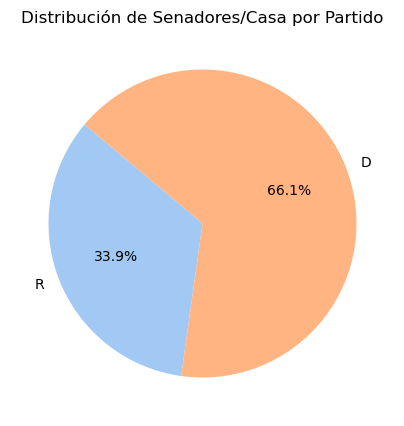

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Conectar a PostgreSQL y obtener los datos
def get_data_from_db():
    conn = psycopg2.connect(
        database="senadores_house_logs",
        user="postgres",
        password="postgres",
        host="localhost",
        port="5432"
    )
    cursor = conn.cursor()
    
    # Obtener distribución de senadores/casa por partido
    cursor.execute("SELECT party, COUNT(*) FROM structured_logs GROUP BY party;")
    party_data = cursor.fetchall()
    
    # Obtener distribución de senadores/casa por distrito
    cursor.execute("SELECT distrit, COUNT(*) FROM structured_logs GROUP BY distrit;")
    district_data = cursor.fetchall()
    
    conn.close()
    return party_data, district_data

# Graficar distribución de senadores/casa por partido
def plot_pie_chart(party_data):
    labels, sizes = zip(*party_data)
    plt.figure(figsize=(5,5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title("Distribución de Senadores/Casa por Partido")
    plt.show()
if __name__ == "__main__":
    party_data, district_data = get_data_from_db()
    plot_pie_chart(party_data)

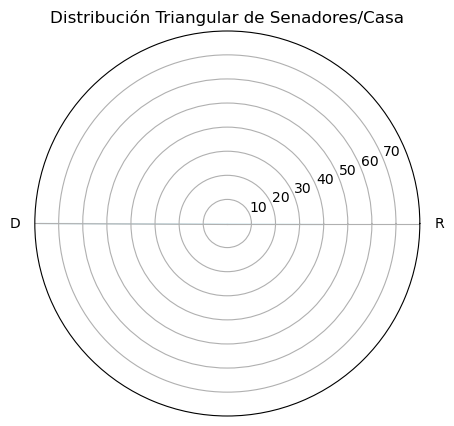

In [187]:
# Conectar a PostgreSQL y obtener los datos
def get_data_from_db():
    conn = psycopg2.connect(
        database="senadores_house_logs",
        user="postgres",
        password="postgres",
        host="localhost",
        port="5432"
    )
    cursor = conn.cursor()
    
    # Obtener distribución de senadores/casa por partido
    cursor.execute("SELECT party, COUNT(*) FROM structured_logs GROUP BY party;")
    party_data = cursor.fetchall()
    
    # Obtener distribución de senadores/casa por distrito
    cursor.execute("SELECT distrit, COUNT(*) FROM structured_logs GROUP BY distrit;")
    district_data = cursor.fetchall()
    
    conn.close()
    return party_data, district_data

# Graficar distribución triangular
def plot_triangular_chart(party_data):
    labels, sizes = zip(*party_data)
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    sizes += sizes[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
    ax.fill(angles, sizes, color='lightblue', alpha=0.6)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title("Distribución Triangular de Senadores/Casa")
    plt.show()

if __name__ == "__main__":
    party_data, district_data = get_data_from_db()
    plot_triangular_chart(party_data)

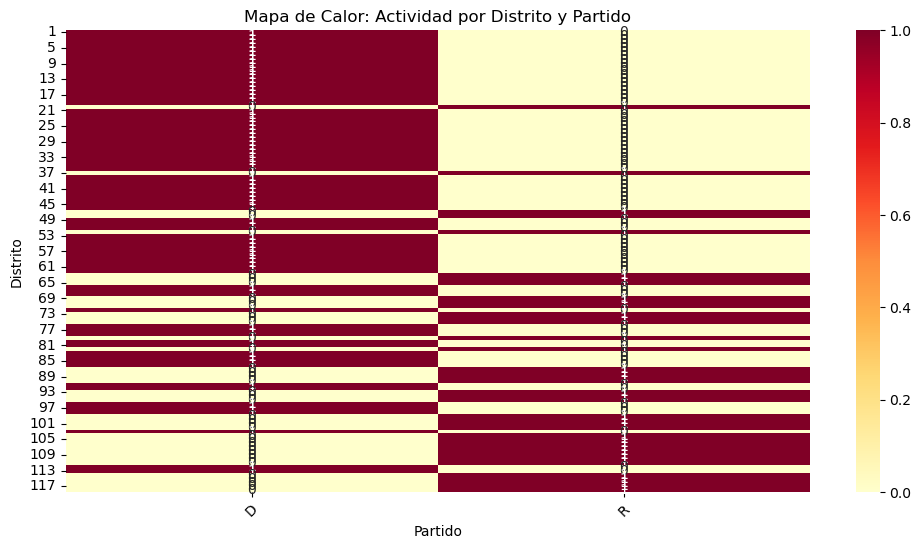

In [ ]:
def fetch_data():
    try:
        # Conectar a la base de datos
        conn = psycopg2.connect(
            database="senadores_house_logs",
            user="postgres",
            password="postgres",
            host="localhost",
            port="5432"
        )
        cursor = conn.cursor()
        
        # Consultar los datos
        query = "SELECT name, committees, distrit, party FROM structured_logs;"
        cursor.execute(query)
        
        # Cargar datos en un DataFrame
        data = cursor.fetchall()
        df = pd.DataFrame(data, columns=["name", "committees", "distrit", "party"])
        
        cursor.close()
        conn.close()
        
        return df
    except Exception as e:
        print(f"Error al obtener datos: {e}")
        return None

def plot_heatmap(df):
    plt.figure(figsize=(12, 6))
    
    # Contar la frecuencia de cada combinación distrito-partido
    heatmap_data = df.groupby(["distrit", "party"]).size().unstack(fill_value=0)
    
    sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d")
    # sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt="d")
    plt.title("Mapa de Calor: Actividad por Distrito y Partido")
    plt.xlabel("Partido")
    plt.ylabel("Distrito")
    plt.xticks(rotation=45)
    
    plt.show()

if __name__ == "__main__":
    df = fetch_data()
    if df is not None and not df.empty:
        plot_heatmap(df)
    else:
        print("No hay datos disponibles para generar el mapa de calor.")